# Portfolio with the Maximum Calmar Ratio for the Realty Sector 

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-1-1"

# Establishing Assets
assets = ['DLF.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'PHOENIXLTD.NS',
         'PRESTIGE.NS', 'BRIGADE.NS', 'IBREALEST.NS', 'SOBHA.NS', 'SUNTECK.NS']



#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  PHOENIXLTD.NS  \
Date                                                                
2017-01-03  0.002944       0.023627      -0.005465      -0.004619   
2017-01-04  0.052762       0.007599       0.000483      -0.005571   
2017-01-05  0.009122       0.004163       0.009461      -0.003464   
2017-01-06 -0.000790      -0.027608      -0.024721      -0.022952   
2017-01-09 -0.000395       0.020661      -0.000982       0.007212   
...              ...            ...            ...            ...   
2020-12-28  0.030919       0.043115       0.008125      -0.007023   
2020-12-29 -0.007533      -0.013537       0.017518       0.024699   
2020-12-30  0.019256      -0.008075       0.037493       0.008952   
2020-12-31 -0.013225       0.027179       0.026840       0.014959   
2021-01-01  0.023346      -0.003427       0.011419       0.013975   

            PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS  SOBHA.NS  SUNTECK.NS  
Date                                                                     
2017-01-03     0.003839    0.010142      0.003293  0.017884    0.051483  
2017-01-04     0.009095   -0.006532      0.054379  0.014311    0.046935  
2017-01-05     0.011615    0.002618     -0.013162  0.010505   -0.006309  
2017-01-06    -0.005210   -0.001963      0.005662  0.012650   -0.007583  
2017-01-09     0.049260    0.017527      0.013088 -0.007722    0.000000  
...                 ...         ...           ...       ...         ...  
2020-12-28     0.020960   -0.000809      0.078289  0.044881   -0.000286  
2020-12-29    -0.015539   -0.008741     -0.022589  0.005629   -0.000429  
2020-12-30    -0.012381    0.004888      0.034641  0.070956    0.018854  
2020-12-31     0.004520    0.012116      0.035917  0.080706   -0.023012  
2021-01-01     0.002627    0.001204     -0.019036 -0.020466    0.020763  

[988 rows x 9 columns]

In [3]:
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
df = df.copy()

for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    ### daily return of the portfolio based on a given set of weights
    df['portfolio_ret'] = df.iloc[:,0]*weights[0]+df.iloc[:,1]*weights[1]+df.iloc[:,2]*weights[2]
  
                       
    # Calculating mean
    E = df['portfolio_ret'].mean()
    
    
    # Annualizing mean
    E = E*252
    

    
    # Calculating Drawdown
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = 1 - (comp_ret/peak)
        return dd.max()

    max_drawdown = max_drawdown(df['portfolio_ret'])
   
    #Calculating Annualised Calmar
    Calmar = E / max_drawdown
    
                   
    # Populating the 'result' array with the required values: Mean, Drawdown, Calmar followed by the weights                   
    result[i,0] = E
    result[i,1] = max_drawdown
    result[i,2] = Calmar
    
    for j in range(len(assets)):
        result[i,j+3]= weights[j]

In [5]:
# Converting 'result' into a DataFrame

columns = ['Mean','Drawdown', 'Calmar'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Drawdown    Calmar    DLF.NS  GODREJPROP.NS  OBEROIRLTY.NS  \
0     0.082070  0.200013  0.410320  0.175847       0.102564       0.056094   
1     0.120363  0.213163  0.564652  0.022824       0.289592       0.025051   
2     0.080630  0.200208  0.402733  0.165267       0.096011       0.074709   
3     0.122447  0.286816  0.426919  0.179943       0.153146       0.177068   
4     0.056714  0.162068  0.349937  0.064320       0.046760       0.159966   
...        ...       ...       ...       ...            ...            ...   
9995  0.062486  0.122577  0.509770  0.022337       0.135589       0.035468   
9996  0.098558  0.269974  0.365063  0.240506       0.076043       0.143861   
9997  0.100501  0.199500  0.503765  0.083290       0.201335       0.042243   
9998  0.134105  0.289984  0.462457  0.166514       0.205445       0.140752   
9999  0.071008  0.170124  0.417388  0.008850       0.117014       0.145476   

      PHOENIXLTD.NS  PRESTIGE.NS  BRIGADE.NS  IBREALEST.NS  SOBHA.NS  \
0          0.085100     0.178902    0.026297      0.107163  0.178616   
1          0.040262     0.152354    0.042219      0.156928  0.269822   
2          0.068034     0.182539    0.126822      0.114299  0.139998   
3          0.000015     0.178516    0.065033      0.019309  0.126362   
4          0.191523     0.013610    0.053949      0.158696  0.141871   
...             ...          ...         ...           ...       ...   
9995       0.125841     0.173327    0.142987      0.145717  0.108113   
9996       0.151203     0.172801    0.130838      0.045658  0.009764   
9997       0.070096     0.037117    0.072245      0.166036  0.200895   
9998       0.169713     0.138306    0.098836      0.003362  0.053489   
9999       0.050658     0.212814    0.202053      0.018684  0.154688   

      SUNTECK.NS  
0       0.089417  
1       0.000948  
2       0.032321  
3       0.100608  
4       0.169305  
...          ...  
9995    0.110622  
9996    0.029325  
9997    0.126744  
9998    0.023583  
9999    0.089763  

[10000 rows x 12 columns]

In [6]:
Max_Calmar = result.iloc[result['Calmar'].idxmax()]
Max_Calmar

Mean             0.131994
Drawdown         0.225968
Calmar           0.584125
DLF.NS           0.000555
GODREJPROP.NS    0.327654
OBEROIRLTY.NS    0.031797
PHOENIXLTD.NS    0.116349
PRESTIGE.NS      0.072050
BRIGADE.NS       0.090076
IBREALEST.NS     0.013709
SOBHA.NS         0.270729
SUNTECK.NS       0.077081
Name: 8223, dtype: float64

In [7]:
Min_Drawdown = result.iloc[result['Drawdown'].idxmin()]
Min_Drawdown

Mean             0.006516
Drawdown         0.013649
Calmar           0.477399
DLF.NS           0.004308
GODREJPROP.NS    0.013536
OBEROIRLTY.NS    0.002854
PHOENIXLTD.NS    0.058298
PRESTIGE.NS      0.180178
BRIGADE.NS       0.217516
IBREALEST.NS     0.206614
SOBHA.NS         0.114571
SUNTECK.NS       0.202124
Name: 9833, dtype: float64

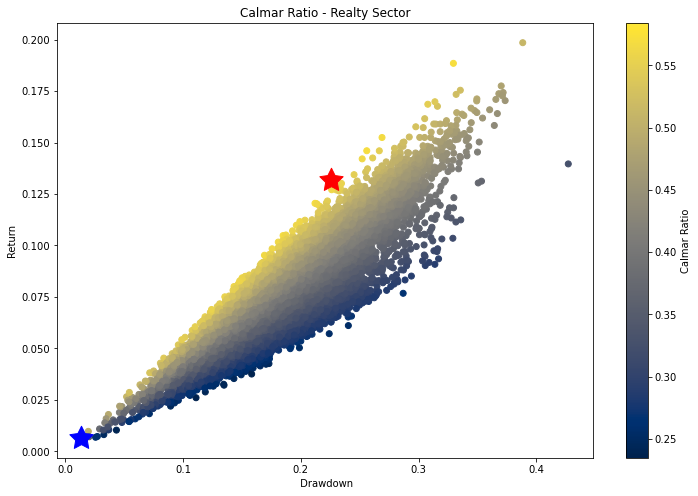

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Drawdown'],y=result['Mean'],c=result['Calmar'],cmap='cividis')
plt.colorbar(label='Calmar Ratio')
plt.xlabel(' Drawdown')
plt.ylabel('Return')

plt.title('Calmar Ratio - Realty Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Calmar[1],Max_Calmar[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_Drawdown[1],Min_Drawdown[0],marker=(5,1,0),color='b',s=600)
plt.show()